# Multi-component phase equilibrium

We can use Raolt's Law to capture the behavior of a liquid-vapor mixture of propane and n-butane, at a mixture pressure of 2 atm. 

For each component $i$,
\begin{equation}
y_{f,i} P_{\text{sat}, i} = y_i P \;,
\end{equation}
where $y_i$ is the mole fraction of component $i$ in the gas phase, $y_{f,i}$ is the mole fraction of component $i$ in the liquid phase, $P$ is the mixture pressure, and $P_{\text{sat}, i}$ is the saturation pressure of component $i$ at the mixture temperature.

First, given a mixture with equal mole fractions of propane and n-butane in the liquid phase, find the equilibrium temperature and the gas-phase mole fractions:

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

# these are mostly for making the saved figures nicer
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.dpi']= 150

import numpy as np
from scipy.optimize import root
from CoolProp.CoolProp import PropsSI

from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity

In [55]:
pressure = Q_(2, 'atm')
components = ['propane', 'butane']

mole_fraction_liquid = np.zeros(2)
mole_fraction_liquid[0] = 0.5
mole_fraction_liquid[1] = 1.0 - mole_fraction_liquid[0]

In [56]:
def get_equilibrium(xvals, pressure, components, mole_fraction_liquid):
    '''Function for finding equilibrium temperature and vapor mole fractions.
    
    xvals[0]: temperature (K)
    xvals[1:]: vapor mole fractions
    '''
    temp = xvals[0]
    mole_fraction_gas = [xvals[1], xvals[2]]
    
    pressure_sat = np.zeros(2)
    pressure_sat[0] = PropsSI('P', 'T', temp, 'Q', 1.0, components[0])
    pressure_sat[1] = PropsSI('P', 'T', temp, 'Q', 1.0, components[1])
    
    return [
        (mole_fraction_liquid[0] * pressure_sat[0] - 
         mole_fraction_gas[0] * pressure.to('Pa').magnitude
         ),
        (mole_fraction_liquid[1] * pressure_sat[1] - 
         mole_fraction_gas[1] * pressure.to('Pa').magnitude
         ),
        mole_fraction_gas[0] + mole_fraction_gas[1] - 1.0
    ]

In [57]:
sol = root(
    get_equilibrium, [250, 0.5, 0.5],
    args=(pressure, components, mole_fraction_liquid,)
    )

print(f'Equilibrium temperature: {sol.x[0]: .2f} K')
print(f'Gas mole fraction of {components[0]}: {sol.x[1]: .3f}')
print(f'Gas mole fraction of {components[1]}: {sol.x[2]: .3f}')

Equilibrium temperature:  262.48 K
Gas mole fraction of propane:  0.833
Gas mole fraction of butane:  0.167


We can use the same approach to show the relationship between liquid and gas mole fraction for the two components:

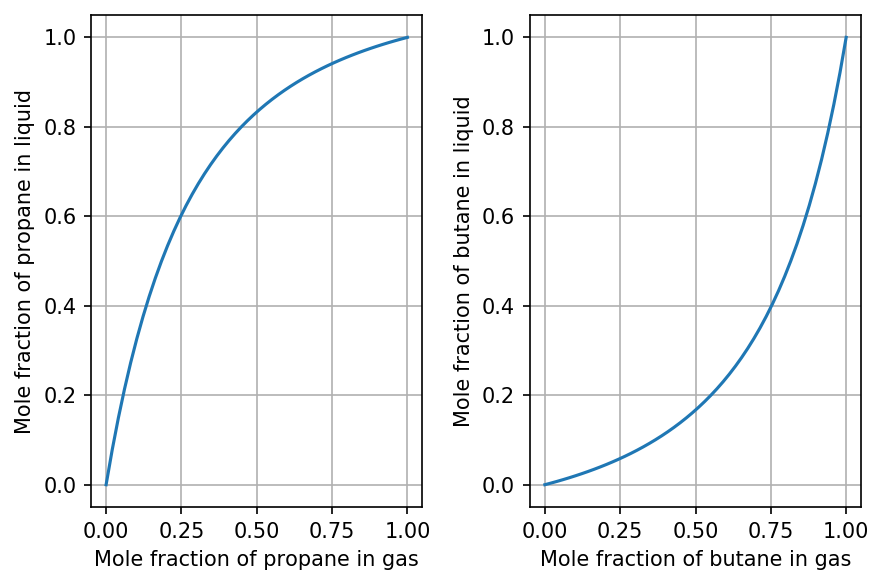

In [58]:
# since we just have two components and the mole 
# fractions must sum to 1.0, we can just create
# a single array for the first component
mole_fractions_liquid = np.linspace(0, 1, 50)

temps = np.zeros(len(mole_fractions_liquid))
mole_fractions_gas = np.zeros((len(mole_fractions_liquid), 2))

for idx, x in enumerate(mole_fractions_liquid):
    sol = root(
        get_equilibrium, [250, 0.5, 0.5],
        args=(pressure, components, [x, 1.0 - x],)
        )
    temps[idx] = sol.x[0]
    mole_fractions_gas[idx] = [sol.x[1], sol.x[2]]

fig, ax = plt.subplots(1, 2)

ax[0].plot(mole_fractions_liquid, mole_fractions_gas[:,0])
ax[0].set_xlabel(f'Mole fraction of {components[0]} in gas')
ax[0].set_ylabel(f'Mole fraction of {components[0]} in liquid')
ax[0].grid(True)

ax[1].plot(1.0 - mole_fractions_liquid, mole_fractions_gas[:,1])
ax[1].set_xlabel(f'Mole fraction of {components[1]} in gas')
ax[1].set_ylabel(f'Mole fraction of {components[1]} in liquid')
ax[1].grid(True)

plt.tight_layout()
plt.show()

The line between the liquid and gas mole fractions is the *equilibrium line*.

Interestingly, we see that the gas phase is richer in propane than the liquid phase, and the leaner in butane.

We can also plot the temperature against the propane mole fractions in the liquid and gas phases:

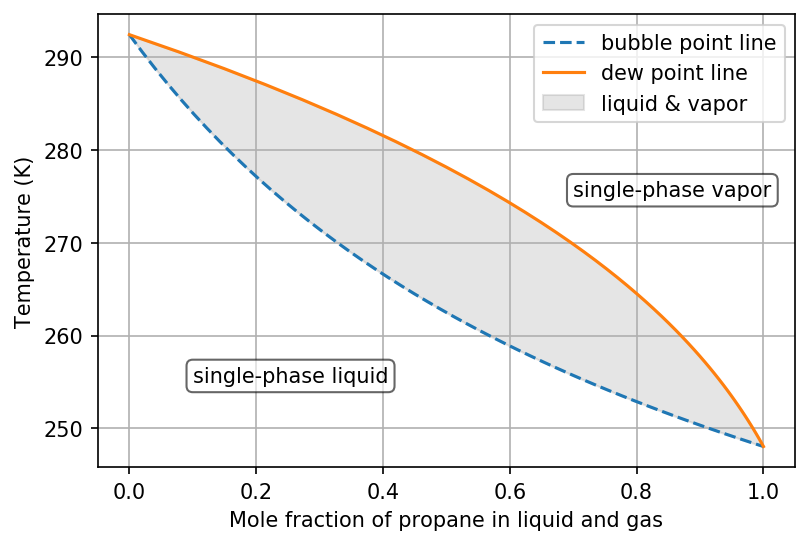

In [78]:
plt.plot(mole_fractions_liquid, temps, '--', label='bubble point line')
plt.plot(mole_fractions_gas[:,0], temps, label='dew point line')

# fill space between the lines
plt.fill_betweenx(
    temps, mole_fractions_liquid, mole_fractions_gas[:,0],
    color='gray', alpha=0.2, label='liquid & vapor'
    )

plt.xlabel('Mole fraction of propane in liquid and gas')
plt.ylabel('Temperature (K)')

# text box properties
props = dict(boxstyle='round', facecolor='white', alpha=0.6)

plt.text(0.1, 255, 'single-phase liquid', bbox=props)
plt.text(0.7, 275, 'single-phase vapor', bbox=props)

plt.grid(True)
plt.legend()
plt.show()

The line formed by the temperature and liquid mole fraction is the *bubble point line* and the line of temperature and vapor mole fraction is the *dew point line*.

The region between the lines shows the temperatures where the liquid and vapor phases can coexist; below the bubble point line, the mixture will always be in a liquid phase, and above the dew point line, the mixture will always in a vapor phase.

This plot can be used to examine the behavior of a two-phase mixture undergoing a heating process. It also shows the *temperature glide*, which is the difference between the temperatures at the dew line and bubble line for a given composition.